<a href="https://colab.research.google.com/github/JesusMe001/An-lisis-Integrado-de-Datos-sobre-C-ncer-y-Diabetes/blob/main/Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importamos las librerías


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importar el data set


### Carga los datos del archivo CSV en un DataFrame de pandas


In [ ]:
dataset=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/deteccionCancer.csv')

In [ ]:
dataset.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [ ]:
dataset['diagnosis'] = dataset['diagnosis'].replace({'B': 1, 'M': 0})

In [ ]:
dataset.drop(columns=['Unnamed: 32'], inplace=True)

Cambiamos los string a int para poder manipular mejor el data set

In [ ]:
dataset.head(100)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,0,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,0,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,0,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,0,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,86208,0,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368
96,86211,1,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
97,862261,1,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988
98,862485,1,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,...,13.06,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756


In [ ]:
dataset.count()   # conocer la cantidad que hay en cada columna

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: i

In [ ]:
dataset.isnull().sum()  #verificar si no hay datos nulo

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Basico EDA

Este analisis podemos observar que los datos de la varieble independiente se divide en 2, "0 y 1" para el diagnosis nos da a entenerder que 0 son los enfermos y 1 son los sanos.

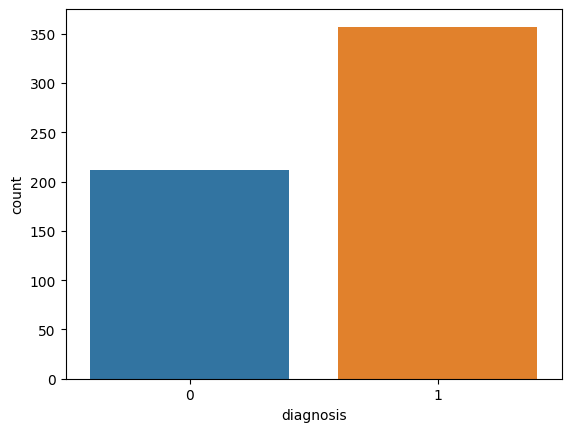

In [ ]:
sns.countplot(x='diagnosis',data=dataset)
plt.show()

In [ ]:
outcome=dataset['diagnosis']
data=dataset[dataset.columns[1:]]


este código parece estar extrayendo la columna 'diagnosis' como la variable objetivo y todas las demás columnas (a partir de la segunda columna en adelante) como las características del modelo.

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(dataset,test_size=0.25,random_state=0,stratify=dataset['diagnosis'])
#esta línea de código crea dos conjuntos, train y test, dividiendo el conjunto de datos original.
# Estos conjuntos se utilizarán para entrenar y evaluar un modelo de aprendizaje supervisado.
X_train=train[train.columns[1:]]  # Las columnas del conjunto de entrenamiento son todas menos la primera
X_test=test[test.columns[1:]]
# Obtener las características del conjunto de entrenamiento y prueba
y_train=train['diagnosis']
y_test=test['diagnosis']

In [ ]:
dataset.shape    # mi datos originales eran de

(569, 32)

In [ ]:
train.shape   #con entrenamiento de 75% hay lo siguiente

(426, 32)

In [ ]:
test.shape    # con prueba con 25% es lo siguiente

(143, 32)

In [ ]:
y_train.head()

74     1
201    0
303    1
151    1
306    1
Name: diagnosis, dtype: int64

# Escalado de variables

Es importante en muchos algoritmos de aprendizaje automático para garantizar que todas las características tendrán una escala similar

In [ ]:
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, KFold
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate

In [ ]:
from sklearn.preprocessing import StandardScaler
# Crear una instancia de StandardScaler
sc_X = StandardScaler()

# Aplicar la transformación de estandarización a las características del conjunto de entrenamiento
X_train = sc_X.fit_transform(X_train)

# Aplicar la misma transformación de estandarización a las características del conjunto de prueba
X_test = sc_X.transform(X_test)


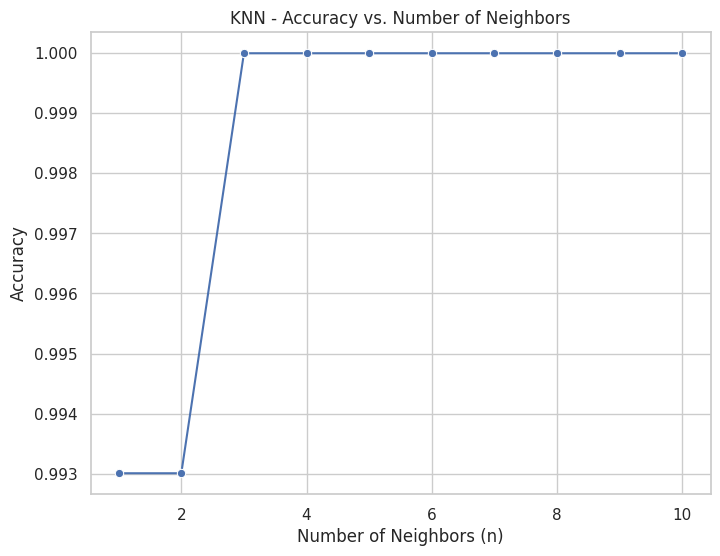

Accuracies for different values of n are: [0.993006993006993, 0.993006993006993, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Supongamos que ya has dividido tus datos en conjuntos de entrenamiento y prueba (X_train, X_test, y_train, y_test)

a_index = list(range(1, 11))
accuracy_values = []

for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = metrics.accuracy_score(prediction, y_test)
    accuracy_values.append(accuracy)

# Crear un DataFrame para facilitar el uso de Seaborn
df = pd.DataFrame({'n_neighbors': a_index, 'accuracy': accuracy_values})

# Utilizar Seaborn para trazar la precisión en función del número de vecinos
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(x='n_neighbors', y='accuracy', data=df, marker='o')
plt.title('KNN - Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (n)')
plt.ylabel('Accuracy')
plt.show()

print('Accuracies for different values of n are:', accuracy_values)

  p = 2   permite especificar el tipo de distancia a utilizar para medir la proximidad entre las muestras de datos

In [ ]:

algoritmos = {
              'Logistic Regression': LogisticRegression(random_state=42),
              'Descition Tree': DecisionTreeClassifier(criterion='entropy', random_state=42),
              'SVM': SVC(kernel = "rbf", C=10, random_state=42, probability=True),
              'Random Forest': RandomForestClassifier(n_estimators = 100, criterion = "entropy", random_state = 42),
              'KNN': KNeighborsClassifier(n_neighbors = 7, metric = "minkowski", p = 2),
              'Naive Bayes': GaussianNB(),
              }


#funcion para evaluar metricas
def evaluacion(y_true, y_pred, metricas):
    res = {}
    for nombre, funcion in metricas.items():
        res[nombre] = np.round(funcion(y_true, y_pred),4)
    return res

k=10

metricas = {
  'ACC':   metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred, average='macro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred, average='macro'),           #average='macro'para calcular la recuperación promedio en cada clase y devolver la media no ponderada.
  'ROC':    lambda y_true, y_pred:
            metrics.roc_auc_score(y_true, y_pred, average='macro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='macro'),
  'MSE':    lambda y_true, y_pred:
            metrics.mean_squared_error(y_true, y_pred),           #No se utiliza averageen esta métrica, ya que se trata de un problema de regresión
  'MAE':    lambda y_true, y_pred:
            metrics.mean_absolute_error(y_true, y_pred)
}

y_pred = {}
headers = ['METRICS']
ACC,PREC,RECALL,F1,ROC,MSE,MAE = ['ACCURACY'],['PRECISION'],['RECALL'],['F1'],['ROC'],['MSE'],['MAE']

for nombre, alg in algoritmos.items():
    y_pred[nombre] = cross_val_predict(alg, X_train, y_train, cv=KFold(n_splits=k, shuffle=True, random_state=42))
    results = evaluacion(y_train, y_pred[nombre], metricas)
    headers.append(nombre)
    ACC.append(results['ACC'])
    PREC.append(results['PREC'])
    RECALL.append(results['RECALL'])
    F1.append(results['F1'])
    ROC.append(results['ROC'])
    MSE.append(results['MSE'])
    MAE.append(results['MAE'])

my_data = [tuple(ACC), tuple(PREC), tuple(RECALL), tuple(F1), tuple(ROC), tuple(MSE), tuple(MAE)]
print(tabulate(my_data, headers=headers))


METRICS      Logistic Regression    Descition Tree     SVM    Random Forest     KNN    Naive Bayes
---------  ---------------------  ----------------  ------  ---------------  ------  -------------
ACCURACY                  0.9977                 1  0.9953           0.9977  0.9953              1
PRECISION                 0.9981                 1  0.995            0.9981  0.9963              1
RECALL                    0.9969                 1  0.995            0.9969  0.9937              1
F1                        0.9975                 1  0.995            0.9975  0.995               1
ROC                       0.9969                 1  0.995            0.9969  0.9937              1
MSE                       0.0023                 0  0.0047           0.0023  0.0047              0
MAE                       0.0023                 0  0.0047           0.0023  0.0047              0


Logistic Regression:

Muy alto rendimiento en todas las métricas (cercano a 1), lo que sugiere que el modelo es muy preciso y tiene un buen equilibrio entre precisión y recuperación.

Decision Tree:

Rendimiento perfecto en todas las métricas. Este resultado es bastante inusual y podría ser indicativo de sobreajuste al conjunto de entrenamiento o problemas en la evaluación.

SVM (Support Vector Machine):

Muy alto rendimiento en todas las métricas, similar a la regresión logística. Indica que el modelo SVM también es muy preciso.

Random Forest:

Rendimiento muy alto en todas las métricas, similar a la regresión logística y SVM.

KNN (K-Nearest Neighbors):

Buen rendimiento en todas las métricas, cercano al rendimiento de los modelos anteriores.

Naive Bayes:

Rendimiento perfecto en todas las métricas. Similar al caso del árbol de decisiones, esto podría ser indicativo de problemas en la evaluación o sobreajuste.

En términos generales, estos resultados sugieren que todos los modelos están funcionando excepcionalmente bien en este conjunto de datos, con valores cercanos a 1 en la mayoría de las métricas. Sin embargo, la perfección en algunas métricas (por ejemplo, Decision Tree y Naive Bayes) debería ser examinada con precaución, ya que podría ser indicativo de problemas en la evaluación o sobreajuste a los datos de entrenamiento. Es importante considerar la naturaleza del conjunto de datos y realizar una validación cruzada para obtener una evaluación más robusta del rendimiento del modelo.


Los dos mejores Logistic Regression y Random Forest con 0.9981 de precicion

# Evaluar los Algoritmos con el conjunto de TEST

# Comparacion de los acurracy de **TEST**

# Elaborar una matriz de confusión

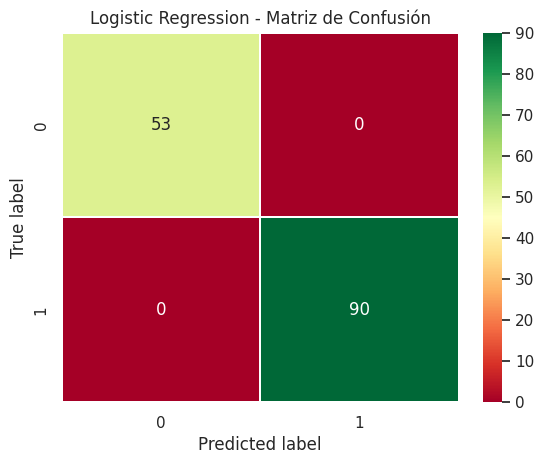

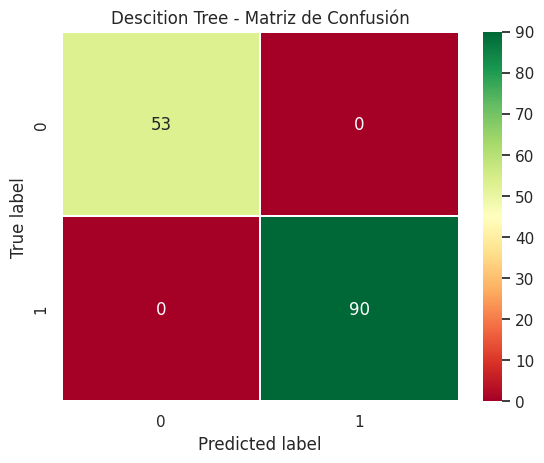

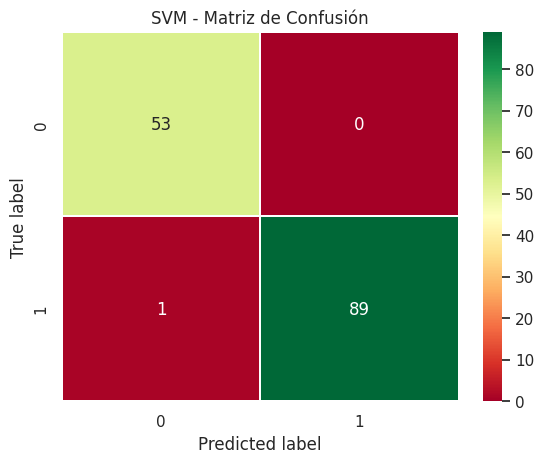

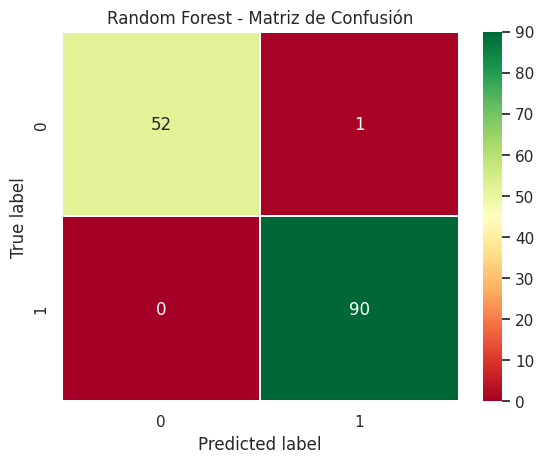

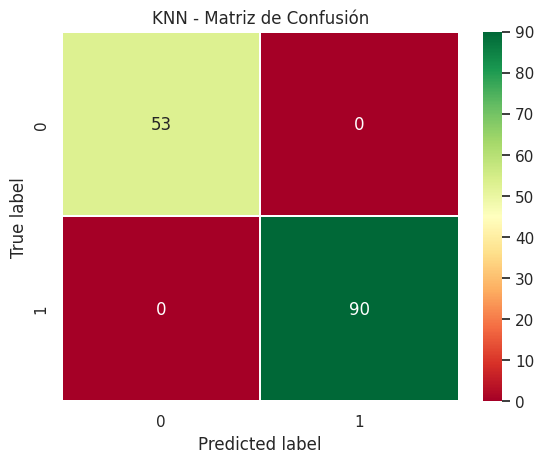

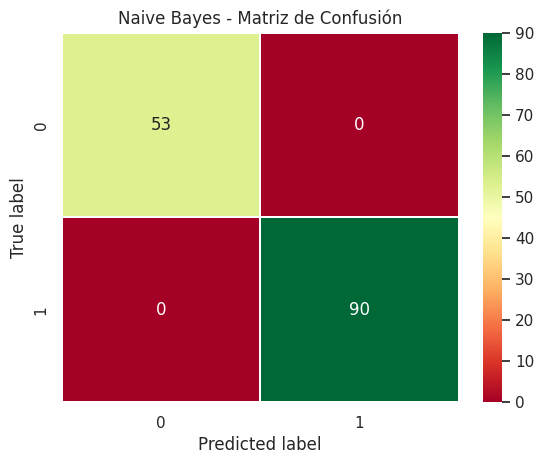

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

for nombre, alg in algoritmos.items():
    y_pred = alg.fit(X_train, y_train).predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='RdYlGn', linewidths=0.2)
    plt.title(nombre + ' - Matriz de Confusión')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

Con esto podemos deducir q cualquiera q usemos va a ser muy preciso

# Correlation Matrix

La "Correlation Matrix" (Matriz de conexiones) es una matriz que muestra la relación de conexiones entre pares de variables en un conjunto de datos. Es una herramienta utilizada en el análisis exploratorio de datos y en la estadística descriptiva para comprender cómo se relacionan entre sí las diferentes variables.

Un valor de 1 indica una conexión positiva perfecta, lo que significa que las variables están altamente relacionadas de manera directa.
Un valor de -1 indica una conexión negativa perfecta, lo que significa que las variables están altamente relacionadas de manera inversa.
Un valor de 0 indica que no hay correlación lineal entre las variables, lo que significa que no hay una relación lineal clara entre ellas.

la matriz son la variable independiente que es la de los resultaso

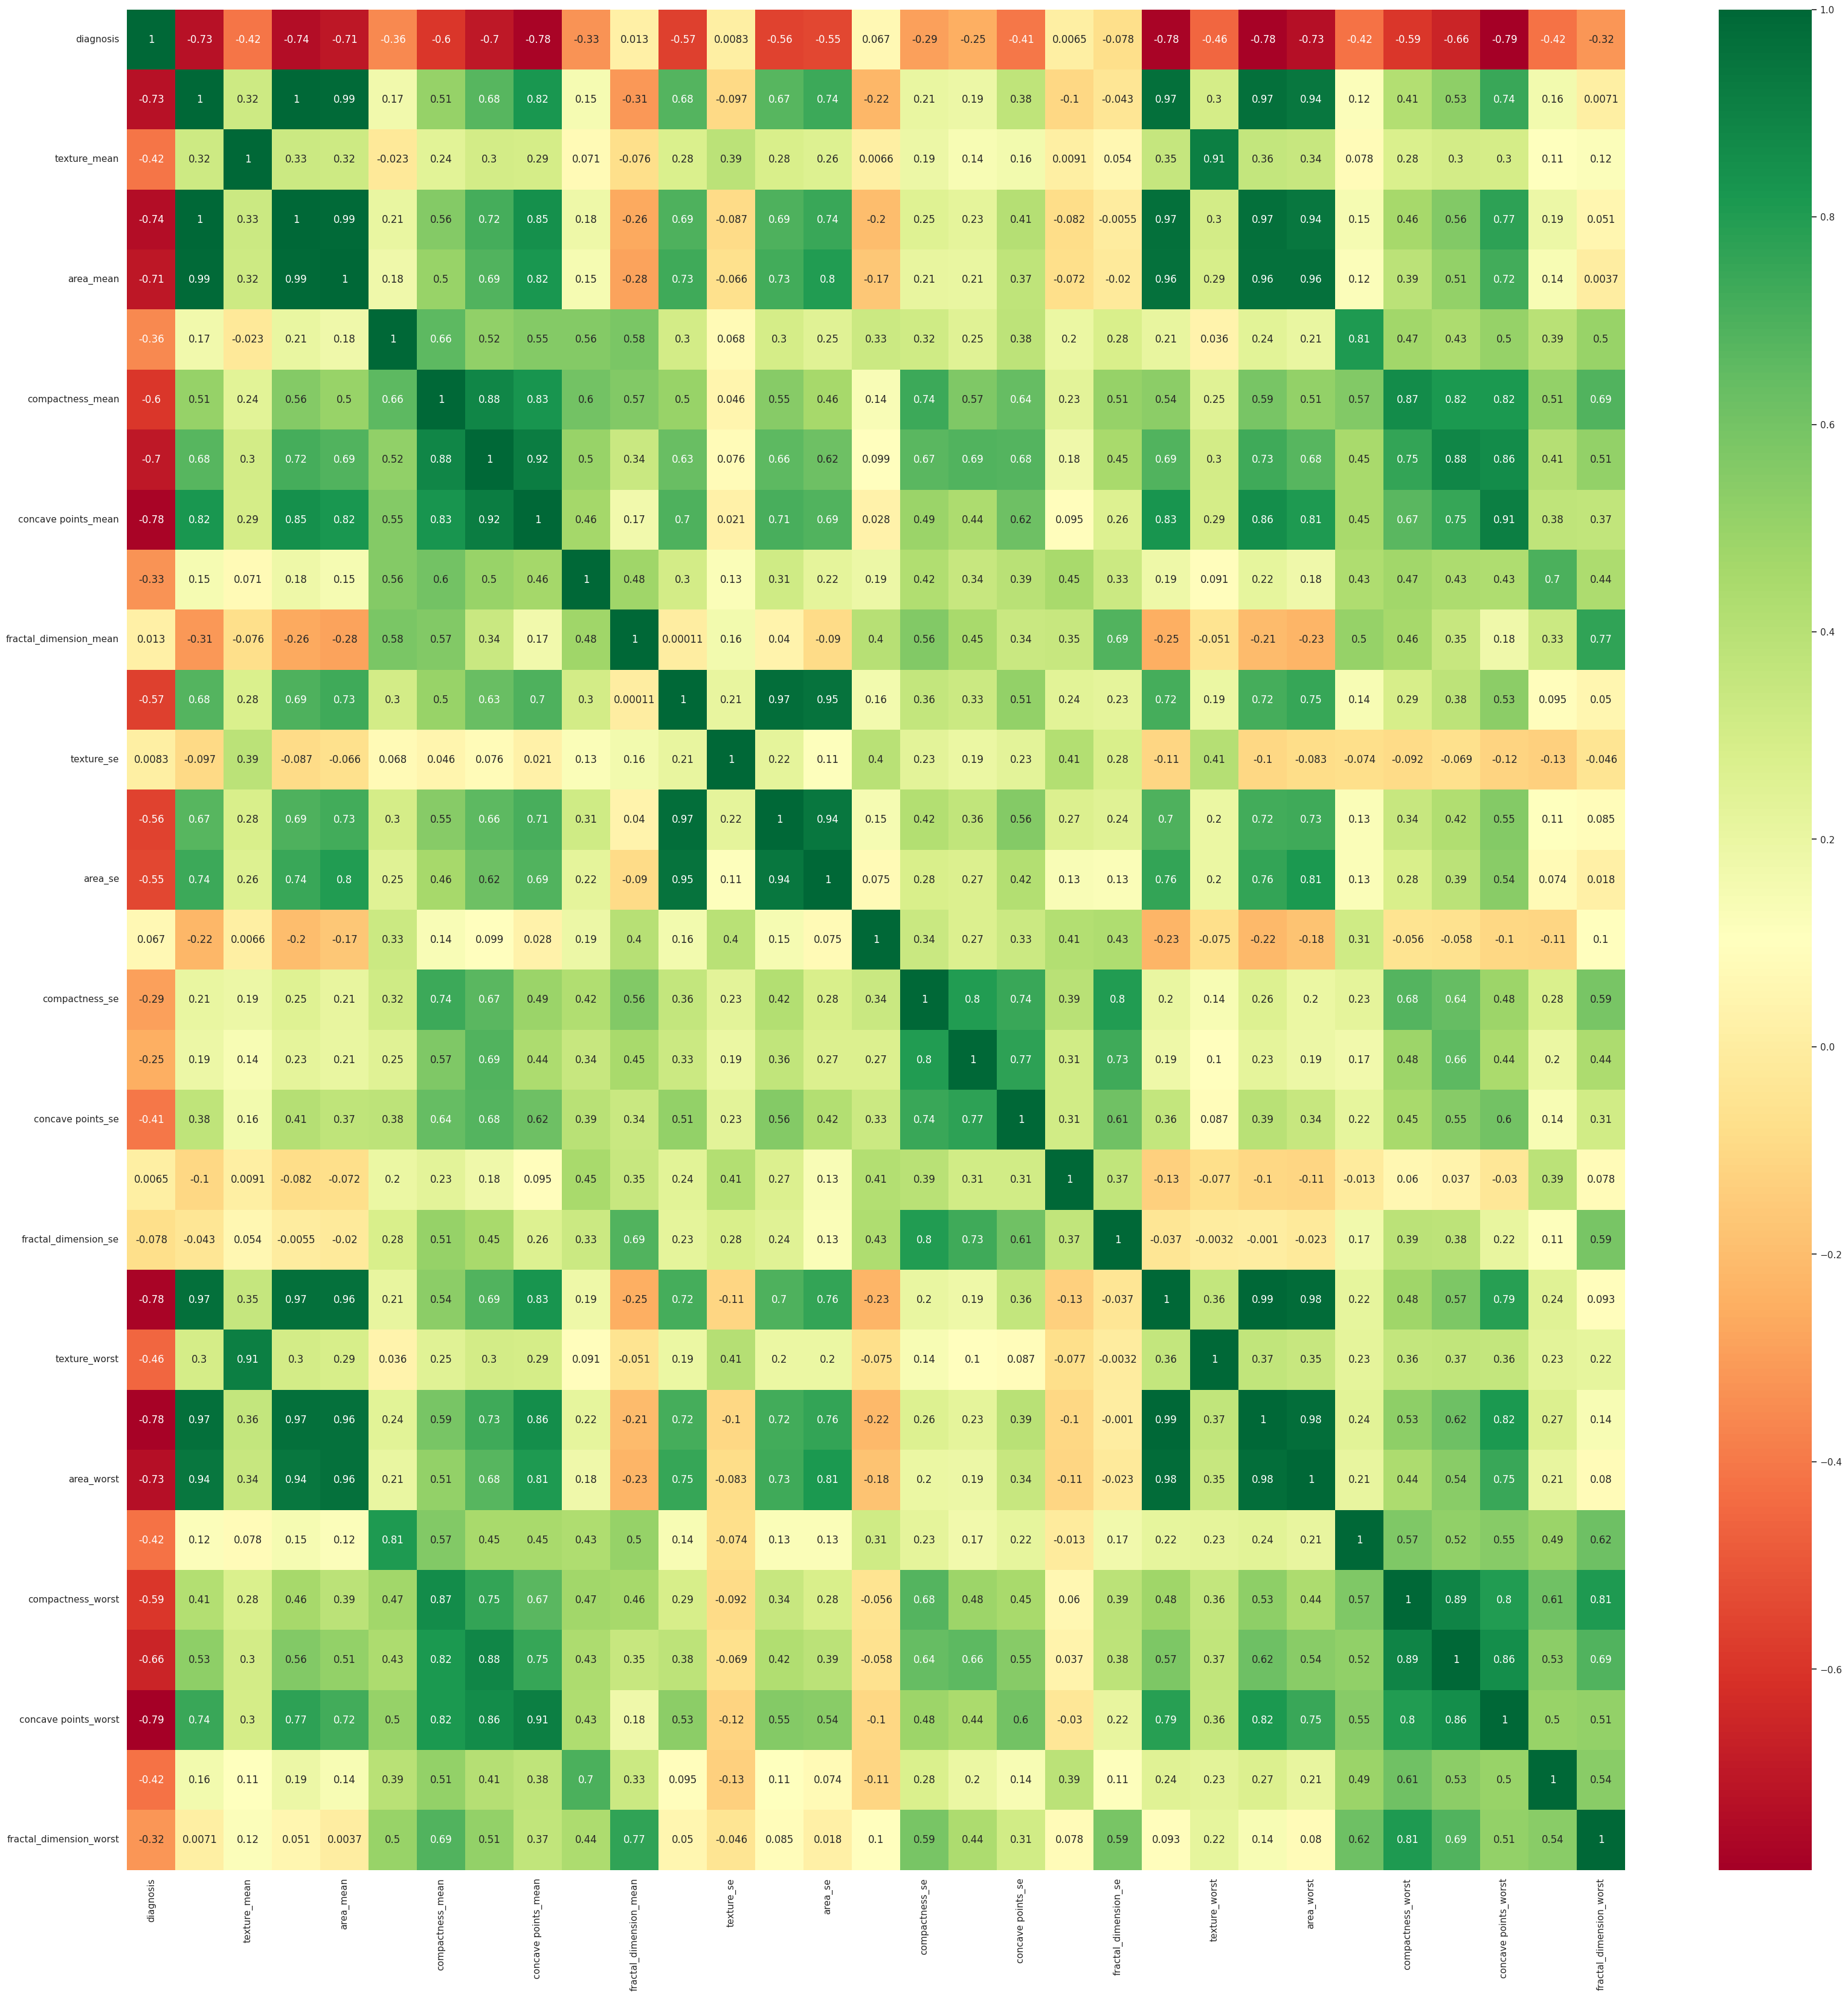

In [ ]:
sns.heatmap(dataset[dataset.columns[1:]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(40,40)
plt.show()

la matriz con todas sus columnas